In [90]:
# Adding the path to the TS_Agent.py file as a system path
import sys  
sys.path.append('../src')
# Importing the .py file with TS agent definition
import TS_Agent as agent_def

# Importing other required libs
import matplotlib.pyplot as plt 
import numpy as np

## Case Study:

### A battery agent needs to make actions for 300 instants out of all available 1440 instants in a day to achieve its desired charged state. However, the price paid for charging at each instant of the day is variable, is unknown to the learning agent, and is stochastic.

In [91]:
# Initializing an Agent named "Agent 1" that needs 
agent_name = "Agent_1"
resource_required = 250
instants = 1440
alpha = 1

Agent1 = agent_def.TS_Agent(agent_name, resource_required, instants, alpha)

In [92]:
# Number of simulation days
days = 100

In [93]:
# A list for recording agent's observed rewards
observed_rewards = []

# For each simulation day, the learning agent will make a charging policy. It will then observe rewards equal to instataneous 
# price for each selected charging minute of the simulation day. Agent will update its estimate based on this reward. The 
# Stochastic electricity price is also re-initialized for each day.
for day in range (0,days):
    # Variable price curve with a white noise for the agent's reward. 
    # It can be replaced with more realistic electricity price curve as well.
    # It should be noted that here reward = price_curve = 1 - electricity price
    white_noise = np.random.normal(10, 5, 1).astype(int)[0]
    price_curve = np.array([1 if (t>(600 + white_noise) and t<(900 + white_noise)) else 0 for t in range(0,1440)])
    Agent1.select_actions()
    for minute in range(0,1440):
        if (minute in Agent1.get_selected_actions()):
            Agent1.update_estimate(minute,price_curve[minute])
            observed_rewards.append(price_curve[minute])

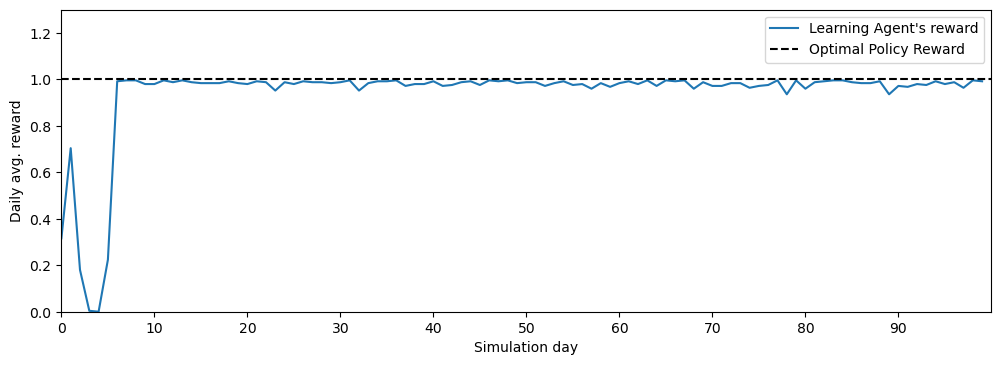

In [94]:
# Plotting average daily reward observed by the learning agent
plt.figure(figsize=(12,4), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(np.average(np.array(observed_rewards).reshape(-1, resource_required), axis=1))
plt.axhline(y=1, color='black', linestyle='--', alpha = 1);
plt.xlabel('Simulation day')
plt.ylabel('Daily avg. reward')
plt.legend(["Learning Agent's reward", 'Optimal Policy Reward'])
plt.xlim(0,days)
plt.ylim(0,1.3)
plt.xticks([i for i in range(0,days,10)]);